# Customer Segmentation using K-Means Clusering

Customer segmentation using K-Means clustering involves grouping customers based on similar behaviors or attributes (e.g., purchase history, demographics, or browsing patterns). This technique is widely used in marketing and business analytics to target specific customer groups effectively.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Mall Customer Dataset.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [4]:
df.columns = ['CustomerID', 'Gender', 'Age', 'Annual Income',
       'Spending Score']

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual Income   200 non-null    int64 
 4   Spending Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


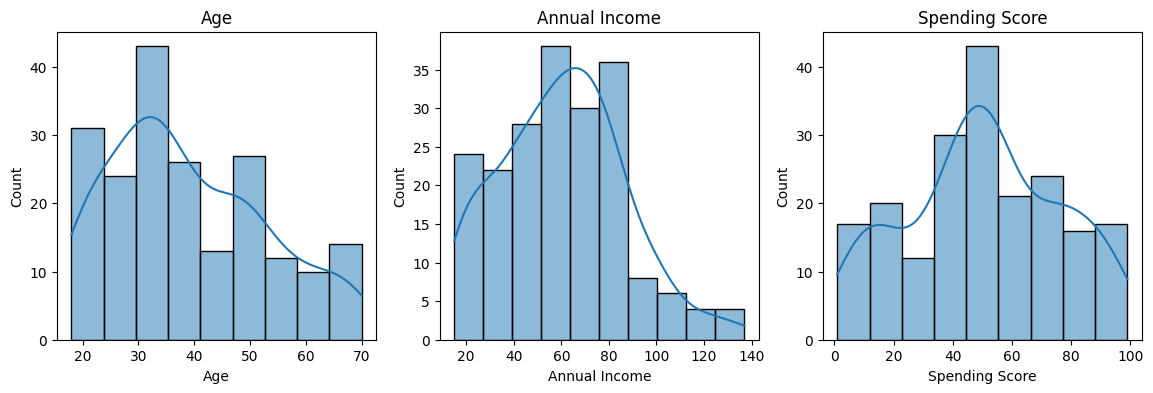

In [11]:
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
sns.histplot(df,x="Age",kde=True,fill=True)
plt.title("Age")

plt.subplot(1,3,2)
sns.histplot(df,x="Annual Income",kde=True,fill=True)
plt.title("Annual Income")

plt.subplot(1,3,3)
sns.histplot(df,x="Spending Score",kde=True,fill=True)
plt.title("Spending Score")

plt.show()

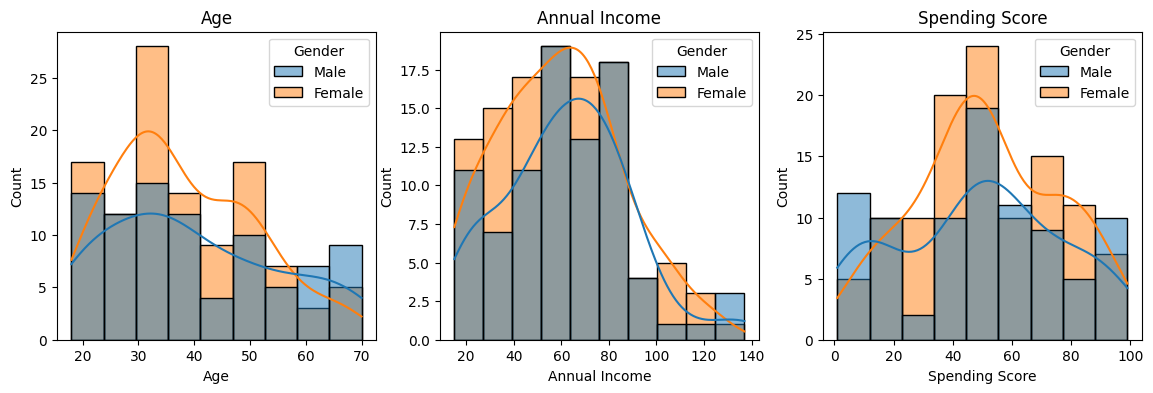

In [13]:
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
sns.histplot(df,x="Age",kde=True,fill=True,hue="Gender")
plt.title("Age")

plt.subplot(1,3,2)
sns.histplot(df,x="Annual Income",kde=True,fill=True,hue="Gender")
plt.title("Annual Income")

plt.subplot(1,3,3)
sns.histplot(df,x="Spending Score",kde=True,fill=True,hue="Gender")
plt.title("Spending Score")

plt.show()

In [14]:
df["Gender"].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

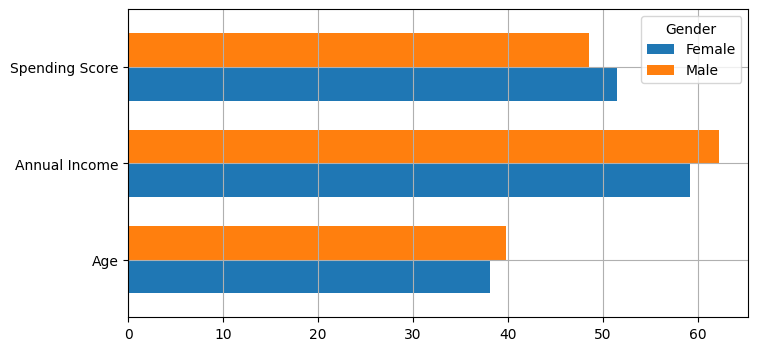

In [20]:
df.groupby("Gender")[["Age","Annual Income","Spending Score"]].mean().T.plot.barh(figsize=(8,4),
                                                                                 width=0.7,grid="x")
plt.show()

In [24]:
ohe = OneHotEncoder(drop="first")

> drop="first"
* Avoiding the Dummy Variable Trap:
    * By dropping the first column, one category is removed to ensure the features are not perfectly multicollinear.
* Without dropping, the sum of the encoded columns can reconstruct the original variable, introducing redundancy.

In [25]:
gender = ohe.fit_transform(df[["Gender"]])

In [26]:
gender.toarray()

array([[1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],

In [28]:
ohe.get_feature_names_out

<bound method OneHotEncoder.get_feature_names_out of OneHotEncoder(drop='first')>

In [29]:
df["Gender"] = gender.toarray()

In [30]:
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,1.0,19,15,39
1,2,1.0,21,15,81
2,3,0.0,20,16,6
3,4,0.0,23,16,77
4,5,0.0,31,17,40


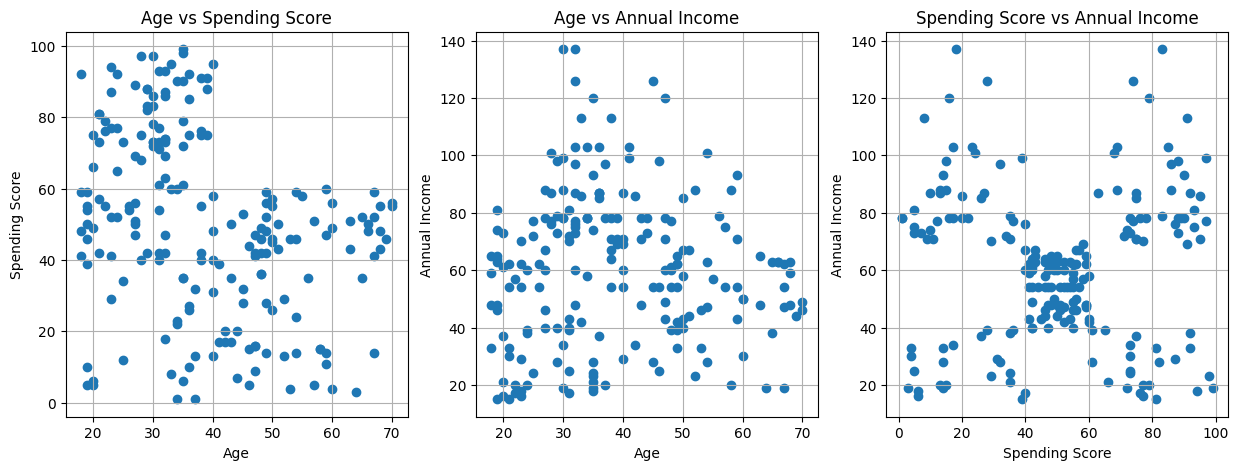

In [34]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.scatter(df["Age"],df["Spending Score"])
plt.title("Age vs Spending Score")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.grid()

plt.subplot(1,3,2)
plt.scatter(df["Age"],df["Annual Income"])
plt.title("Age vs Annual Income")
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.grid()

plt.subplot(1,3,3)
plt.scatter(df["Spending Score"],df["Annual Income"])
plt.title("Spending Score vs Annual Income")
plt.xlabel("Spending Score")
plt.ylabel("Annual Income")
plt.grid()

plt.show()

In [35]:
scalar = StandardScaler()

In [36]:
df[["Age","Annual Income","Spending Score"]]=scalar.fit_transform(df[["Age","Annual Income","Spending Score"]])

In [37]:
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,1.0,-1.424569,-1.738999,-0.434801
1,2,1.0,-1.281035,-1.738999,1.195704
2,3,0.0,-1.352802,-1.700830,-1.715913
3,4,0.0,-1.137502,-1.700830,1.040418
4,5,0.0,-0.563369,-1.662660,-0.395980


In [38]:
df.drop("CustomerID",axis=1,inplace=True)

In [39]:
df.head()

,Gender,Age,Annual Income,Spending Score
0,1.0,-1.424569,-1.738999,-0.434801
1,1.0,-1.281035,-1.738999,1.195704
2,0.0,-1.352802,-1.700830,-1.715913
3,0.0,-1.137502,-1.700830,1.040418
4,0.0,-0.563369,-1.662660,-0.395980


In [42]:
# Elbow method
inertia = []
for i in range(1,15):
    m = KMeans(n_clusters=i)
    m.fit(df)
    inertia.append(m.inertia_)

The given code performs the Elbow Method to determine the optimal number of clusters for K-Means Clustering. Here’s a detailed explanation:
* inertia:
    * Inertia is the sum of squared distances of samples to their closest cluster center.
    * Lower inertia implies tighter clusters, but increasing the number of clusters will always reduce inertia (risk of overfitting).
* Looping Through Clusters:
    *n_clusters=i: Tests cluster sizes from 1 to 14.
    * m.fit(df): Fits the K-Means model to the dataset for each cluster size.
    * inertia.append(m.inertia_): Records the inertia for each number of clusters.

> Output: Elbow Plot
* The "elbow point" is the cluster number where inertia decreases significantly less sharply. This is considered the optimal number of clusters.
* Example:
    * If the elbow occurs at 𝑘=3, use 3 clusters for K-Means.

> Choosing the Right k:

* The Elbow Method is subjective; you may consider silhouette scores for validation.

> Scaling Data:

* Normalize your dataset before applying K-Means for better results, especially if features have varying ranges.

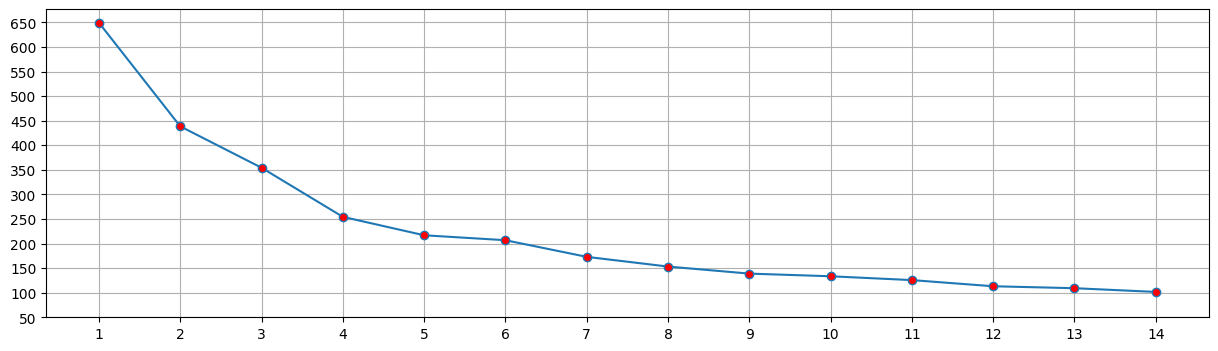

In [48]:
plt.figure(figsize=(15,4))
plt.plot(range(1,15),inertia,marker="o",markerfacecolor="red")
plt.xticks(range(1,15))
plt.yticks(range(50,700,50))
plt.grid()
plt.show()

In [49]:
model1 = KMeans(n_clusters=5)

In [50]:
pred1 = model1.fit_predict(df)
pred1

array([1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1, 2, 1, 0, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 2, 0, 0, 0, 2, 1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 3, 0, 3, 4, 3, 4, 3, 4, 3,
       0, 3, 0, 3, 4, 3, 0, 3, 4, 3, 0, 3, 0, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 0, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3], dtype=int32)

In [51]:
new_df = df.copy()

In [53]:
new_df["Classes"] = pred1

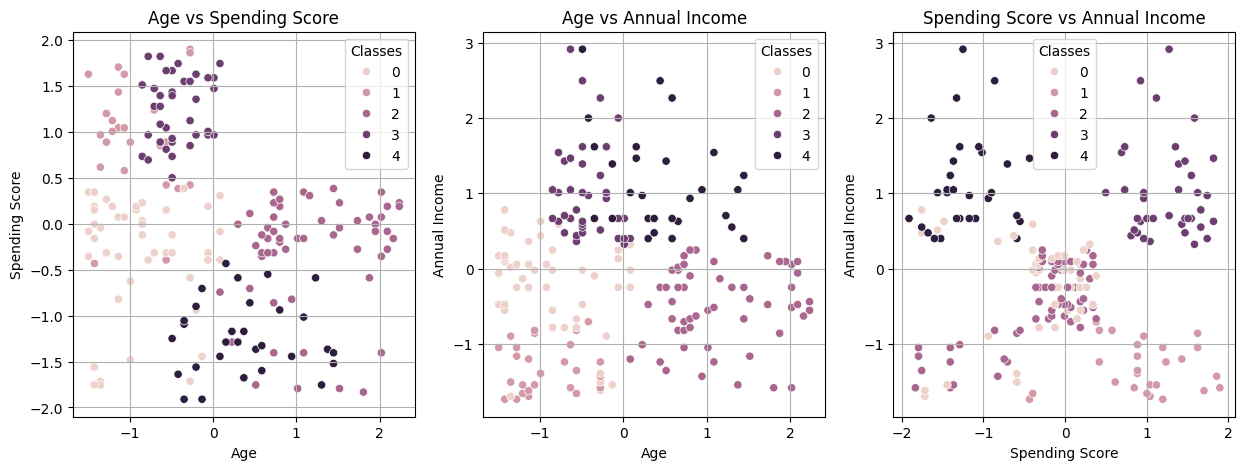

In [57]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.scatterplot(new_df,x="Age",y="Spending Score",hue="Classes")
plt.title("Age vs Spending Score")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.grid()

plt.subplot(1,3,2)
sns.scatterplot(new_df,x="Age",y="Annual Income",hue="Classes")
plt.title("Age vs Annual Income")
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.grid()

plt.subplot(1,3,3)
sns.scatterplot(new_df,x="Spending Score",y="Annual Income",hue="Classes")
plt.title("Spending Score vs Annual Income")
plt.xlabel("Spending Score")
plt.ylabel("Annual Income")
plt.grid()

plt.show()

In [58]:
score = silhouette_score(df,pred1)
score

np.float64(0.34645432427095785)

> Silhouette Score
* Silhouette Score, which is a metric used to evaluate the quality of clustering. 

* The Silhouette Score measures how similar a data point is to its own cluster (cohesion) compared to other clusters (separation).

    * Range: −1 to +1
    * Close to +1 : Well-defined clusters.
    * Close to 0 : Overlapping clusters.
    * Negative: Incorrect clustering.

> Interpreting the Silhouette Score
* High score (≈1): Points are well-clustered and far from other clusters.
* Medium score (≈0): Clusters overlap.
* Negative score (<0): Points are likely assigned to the wrong clusters.

In [59]:
model2 = KMeans(n_clusters=6)

In [60]:
pred2 = model2.fit_predict(df)

In [61]:
pred2

array([4, 0, 4, 0, 4, 0, 4, 0, 3, 0, 3, 0, 3, 0, 4, 0, 4, 0, 3, 0, 4, 0,
       3, 0, 3, 0, 3, 0, 4, 0, 3, 0, 3, 0, 3, 0, 3, 0, 4, 0, 3, 0, 3, 4,
       3, 0, 3, 4, 4, 4, 3, 4, 4, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 4,
       3, 3, 4, 4, 3, 3, 3, 3, 3, 4, 3, 4, 4, 3, 3, 4, 3, 3, 4, 3, 3, 4,
       4, 3, 3, 4, 3, 4, 4, 4, 3, 4, 3, 4, 4, 3, 3, 4, 3, 4, 3, 3, 3, 3,
       3, 4, 4, 4, 4, 4, 3, 3, 3, 3, 4, 4, 4, 2, 4, 2, 1, 2, 1, 2, 1, 2,
       4, 2, 5, 2, 1, 2, 5, 2, 1, 2, 4, 2, 5, 2, 1, 2, 5, 2, 1, 2, 1, 2,
       1, 2, 5, 2, 5, 2, 1, 2, 5, 2, 1, 2, 1, 2, 5, 2, 5, 2, 5, 2, 1, 2,
       1, 2, 1, 2, 5, 2, 1, 2, 5, 2, 1, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2], dtype=int32)

In [62]:
new_df["Classes2"]=pred2

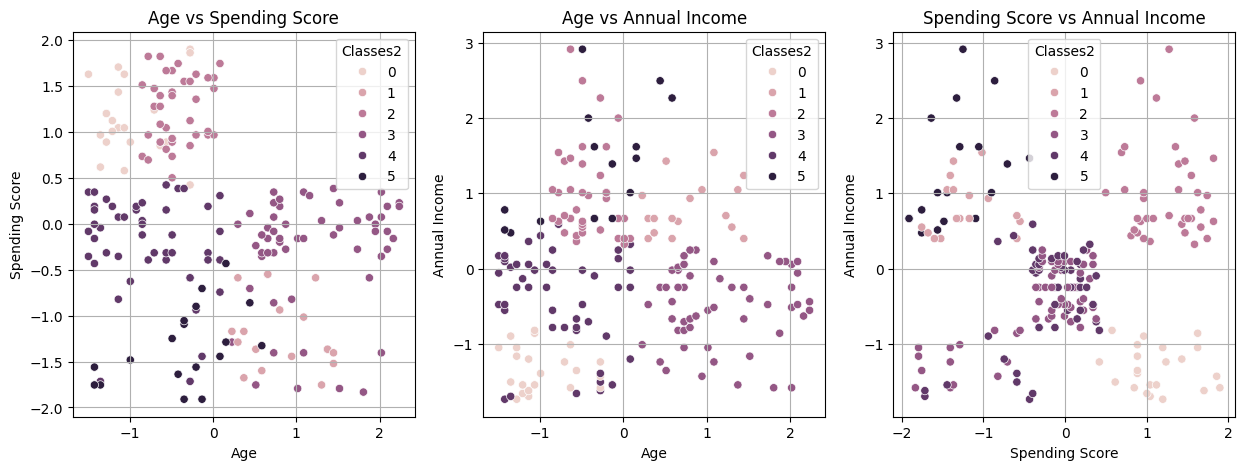

In [63]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.scatterplot(new_df,x="Age",y="Spending Score",hue="Classes2")
plt.title("Age vs Spending Score")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.grid()

plt.subplot(1,3,2)
sns.scatterplot(new_df,x="Age",y="Annual Income",hue="Classes2")
plt.title("Age vs Annual Income")
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.grid()

plt.subplot(1,3,3)
sns.scatterplot(new_df,x="Spending Score",y="Annual Income",hue="Classes2")
plt.title("Spending Score vs Annual Income")
plt.xlabel("Spending Score")
plt.ylabel("Annual Income")
plt.grid()

plt.show()

In [64]:
score2 = silhouette_score(df,pred2)
score2

np.float64(0.3110590084898331)

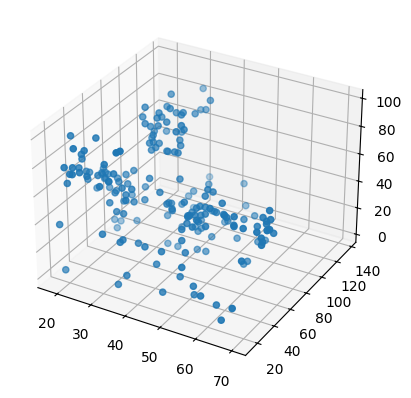

In [89]:
fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
ax.scatter(df["Age"],df["Annual Income"],df["Spending Score"])
plt.show()

AttributeError: 'Axes3D' object has no attribute 'plotsurface'

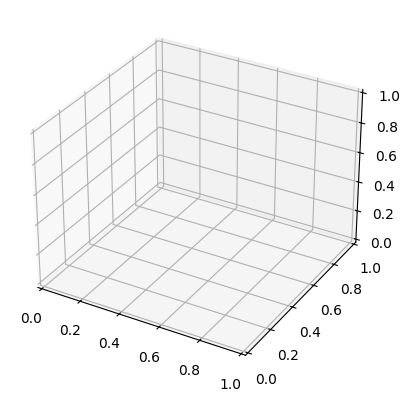

In [90]:
x = df["Age"]
y = df["Annual Income"]
z = df["Spending Score"]
fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
surf = ax.plotsurface(df["Age"],df["Annual Income"],df["Spending Score"])
plt.show()

In [65]:
gr0=new_df[new_df["Classes"]==0].index
gr1= new_df[new_df["Classes"]==1].index
gr2=new_df[new_df["Classes"]==2].index
gr3=new_df[new_df["Classes"]==3].index
gr4=new_df[new_df["Classes"]==4].index

The provided code snippet separates the indices of rows belonging to specific classes in a DataFrame, new_df, where the column "Classes" contains the cluster or category labels (e.g., 0, 1, 2, etc.).

> Code Explanation
* new_df["Classes"] == 0: Filters the rows where the value in the "Classes" column equals 0.
* .index: Retrieves the indices of the rows satisfying the condition.
* Assigning to Variables: The indices are stored in separate variables (gr0, gr1, etc.) for each class.

In [68]:
df[["Age","Annual Income","Spending Score"]]=scalar.inverse_transform(df[["Age","Annual Income","Spending Score"]])

The scaler.inverse_transform method in Python is used to revert scaled data back to its original form. It is commonly used after applying a scaler, such as StandardScaler, MinMaxScaler, or others from the sklearn.preprocessing module.

> When to Use inverse_transform
* After Scaling Data for Model Training:

    * Scaling (standardization or normalization) ensures numerical stability and better model performance.
    * Post-model predictions, you might need to revert the scaled values to their original form for interpretation.
* Reverting Transformed Features:

    * If you scaled input features before clustering, regression, or any other algorithm, this method is essential to make the results meaningful.


In [69]:
df.iloc[gr0][["Age","Annual Income","Spending Score"]].describe()

,Age,Annual Income,Spending Score
count,46.000000,46.000000,46.000000
mean,27.021739,54.630435,41.282609
std,7.273969,16.127766,16.299507
min,18.000000,16.000000,5.000000
25%,20.000000,46.500000,36.250000
50%,26.000000,59.500000,46.500000
75%,33.500000,64.750000,54.000000
max,40.000000,81.000000,60.000000


<Axes: ylabel='Frequency'>

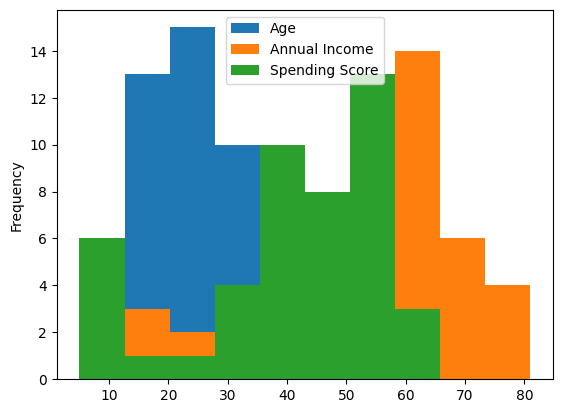

In [70]:
df.iloc[gr0][["Age","Annual Income","Spending Score"]].plot.hist()

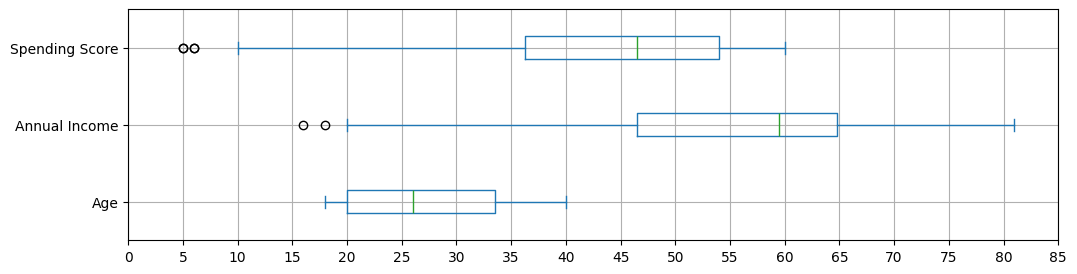

In [74]:
df.iloc[gr0][["Age","Annual Income","Spending Score"]].plot.box(vert=False,figsize=(12,3),grid=True)
plt.xticks(range(0,90,5))
plt.show()

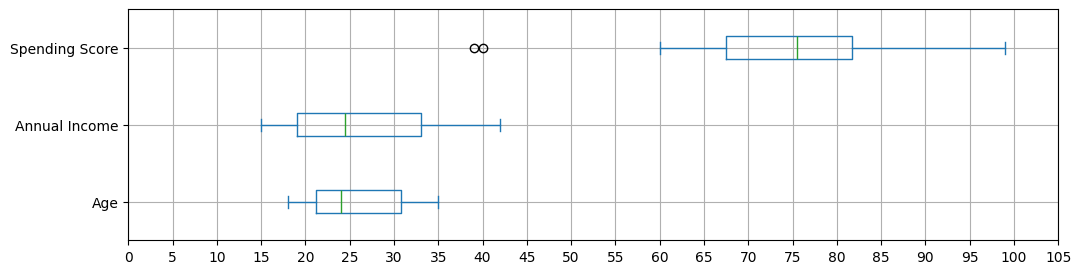

In [78]:
df.iloc[gr1][["Age","Annual Income","Spending Score"]].plot.box(vert=False,figsize=(12,3),grid=True)
plt.xticks(range(0,110,5))
plt.show()

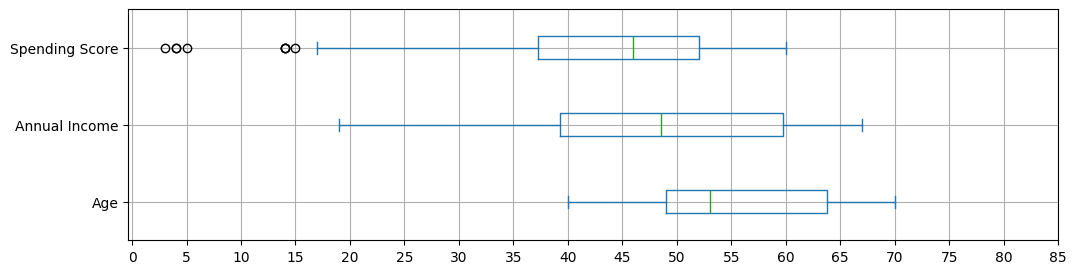

In [76]:
df.iloc[gr2][["Age","Annual Income","Spending Score"]].plot.box(vert=False,figsize=(12,3),grid=True)
plt.xticks(range(0,90,5))
plt.show()

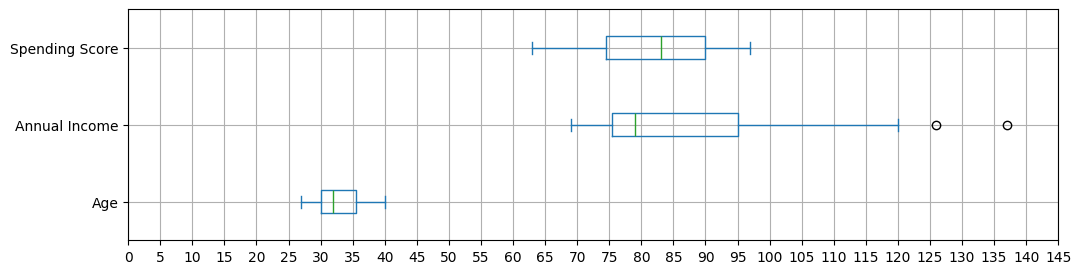

In [80]:
df.iloc[gr3][["Age","Annual Income","Spending Score"]].plot.box(vert=False,figsize=(12,3),grid=True)
plt.xticks(range(0,150,5))
plt.show()

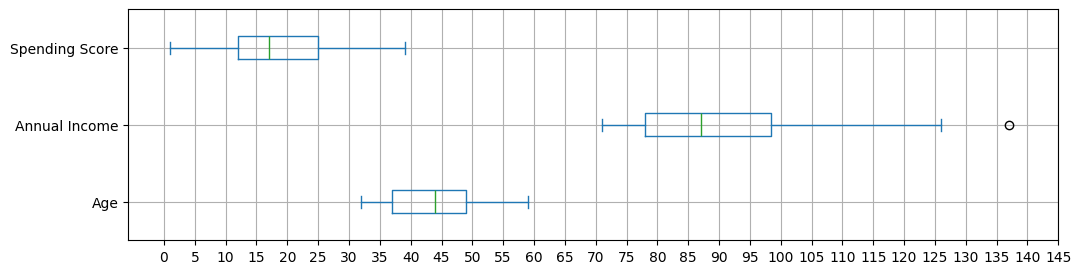

In [82]:
df.iloc[gr4][["Age","Annual Income","Spending Score"]].plot.box(vert=False,figsize=(12,3),grid=True)
plt.xticks(range(0,150,5))
plt.show()

In [83]:
new_df

,Gender,Age,Annual Income,Spending Score,Classes,Classes2
0,1.0,-1.424569,-1.738999,-0.434801,1,4
1,1.0,-1.281035,-1.738999,1.195704,1,0
2,0.0,-1.352802,-1.700830,-1.715913,0,4
3,0.0,-1.137502,-1.700830,1.040418,1,0
4,0.0,-0.563369,-1.662660,-0.395980,1,4
...,...,...,...,...,...,...
195,0.0,-0.276302,2.268791,1.118061,3,2
196,0.0,0.441365,2.497807,-0.861839,4,5
197,1.0,-0.491602,2.497807,0.923953,3,2
198,1.0,-0.491602,2.917671,-1.250054,4,5


In [84]:
new_df.drop("Classes2",axis=1,inplace=True)

In [85]:
new_df.corr()

,Gender,Age,Annual Income,Spending Score,Classes
Gender,1.000000,0.060867,0.056410,-0.058109,0.077449
Age,0.060867,1.000000,-0.012398,-0.327227,0.403180
Annual Income,0.056410,-0.012398,1.000000,0.009903,0.597257
Spending Score,-0.058109,-0.327227,0.009903,1.000000,-0.077130
Classes,0.077449,0.403180,0.597257,-0.077130,1.000000


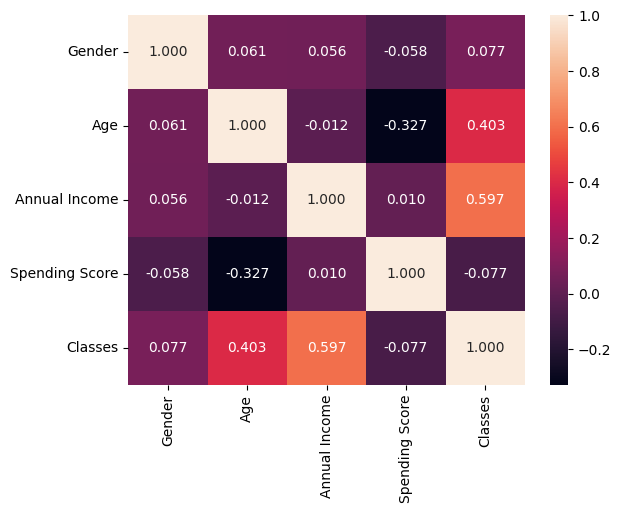

In [87]:
sns.heatmap(new_df.corr(),annot=True,fmt=".3f")
plt.show()